YOLO v9 emerges as a cutting-edge model, boasting innovative features that will play an important role in the further development of object detection, image segmentation, and classification. The new top-tier features allow faster, sharper, and more versatile actions.

The latest research paper proposed the use of Programmable Gradient Information (PGI) to tackle the information bottleneck and the challenge of adapting deep supervision to lightweight architectures of neural networks.

The team has also designed the Generalized Efficient Layer Aggregation Network (GELAN), a handy and practically effective neural network. The network has strong and stable performance at different computational blocks and depth settings regarding object detection. It can indeed be widely expanded into a model suitable for various inference devices. For the above two issues, the introduction of PGI allows both lightweight as well as deep models to achieve significant improvements in accuracy. The YOLO v9, designed by combining PGI and GELAN, has shown strong competitiveness. Its well-thought design allows the deep model to reduce the number of parameters by 49% and the amount of calculations by 43% compared with YOLO v8. However, it still has a 0.6% Average Precision improvement on the MS COCO dataset.

The latest Yolo-v model beats RT-DETR (Realtime Detection Transformer) and YOLO MS in accuracy and efficiency. It uses conventional convolution for better parameter utilization, setting new standards in lightweight model performance

### Precheck

In [ ]:
# Check GPU
!nvidia-smi

In [ ]:
# Check mouting GDrive

### Download github of YOLO

In [ ]:
%cd /content/drive/MyDrive
!git clone https://github.com/WongKinYiu/yolov9

In [ ]:
# Cài đặt thư viện cần thiết
%cd /content/drive/MyDrive/yolov9
!pip install -r requirements.txt

In [ ]:
# Tải weight pretrain
%cd /content/drive/MyDrive/yolov9
!wget -P /content/drive/MyDrive/yolov9 https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt

### Test nhận diện với weight train sẵn

In [ ]:
# Tải file trên mạng về để thử
!wget -P /content/drive/MyDrive/yolov9 -O testimage.png -q https://www.thesenior.com.au/images/transform/v1/crop/frm/130854433/77b80d1e-1d40-430a-a0de-c93e694b64ce.jpg/r86_113_2033_1413_w2119_h1415_fmax.jpg

In [ ]:
%cd /content/drive/MyDrive/yolov9
!python detect.py --weights /content/drive/MyDrive/yolov9/yolov9-e.pt --source /content/drive/MyDrive/yolov9/testimage.png

/content/drive/MyDrive/yolov9
detect: weights=['/content/drive/MyDrive/yolov9/yolov9-e.pt'], source=/content/drive/MyDrive/yolov9/testimage.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v0.1-10-g33fc75e Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/drive/MyDrive/yolov9/testimage.png: 448x640 9 persons, 2 cars, 9 motorcycles, 1 backpack, 1 umbrella, 197.7ms
Speed: 0.6ms pre-process, 197.7ms inference, 680.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


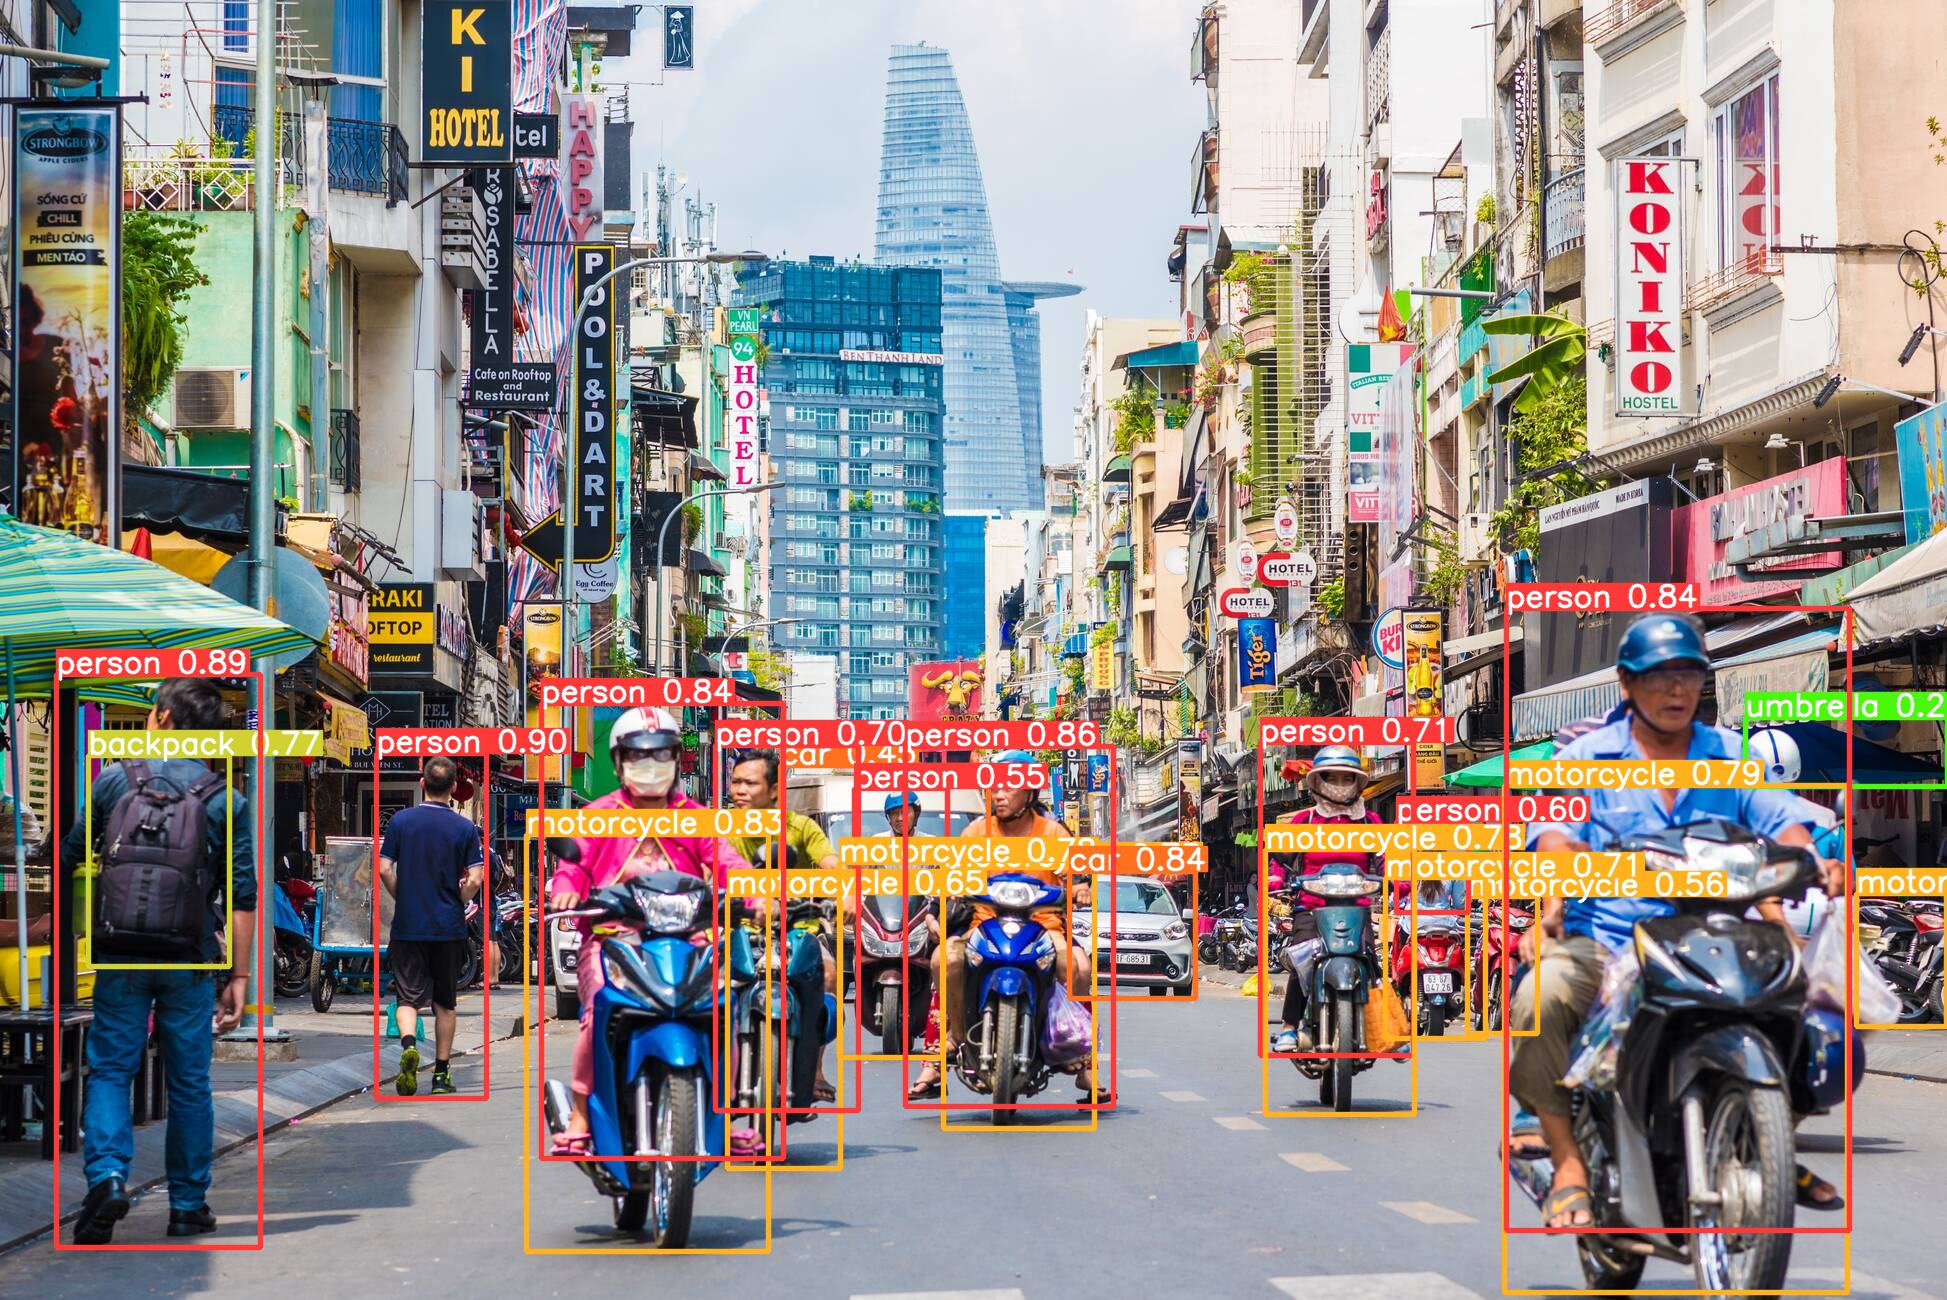

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/yolov9/runs/detect/exp7/testimage.png', width=800)

### Train model với custom data

In [ ]:
### Upload data lên Google drive
#-  Có thể dùng data của Yolo v8

In [ ]:
# Chuẩn bị file data.yaml lưu trong thư mục Yolov9.

In [ ]:
# Chuẩn bị file cấu hình cho model để train
%cd /content/drive/MyDrive/yolov9
!cp /content/drive/MyDrive/yolov9/models/detect/yolov9-e.yaml /content/drive/MyDrive/yolov9/models/detect/yolov9-e-custome.yaml

/content/drive/MyDrive/yolov9


In [ ]:
#Train
# train yolov9 models
!python train_dual.py --workers 8 --device 0 --batch 4 --data /content/drive/MyDrive/yolov9/data.yaml --img 640 --cfg /content/drive/MyDrive/yolov9/models/detect/yolov9-e-custome.yaml --weights /content/drive/MyDrive/yolov9/yolov9-e.pt --name yolov9-c --hyp /content/drive/MyDrive/yolov9/data/hyps/hyp.scratch-high.yaml --min-items 0 --epochs 50 --close-mosaic 15

# train gelan models
# python train.py --workers 8 --device 0 --batch 32 --data data/coco.yaml --img 640 --cfg models/detect/gelan-c.yaml --weights '' --name gelan-c --hyp hyp.scratch-high.yaml --min-items 0 --epochs 500 --close-mosaic 15

### Test với weight vừa train

In [ ]:
# Tải vài ảnh trên mạng về
!wget -P /content/drive/MyDrive/yolov9 -O testimage_01.png -q https://decordi.vn/wp-content/uploads/2021/11/1-trang-tri-phong-khach-voi-bo-sofa-va-ban-tra-go.jpg
!wget -P /content/drive/MyDrive/yolov9 -O testimage_02.png -q https://noithatfuhome.com/wp-content/uploads/2020/03/thiet-ke-noi-that-phong-khach-co-dien-1.jpg

In [ ]:
# Nhận diện bằng weight mới
%cd /content/drive/MyDrive/yolov9
!python detect.py --weights /content/drive/MyDrive/yolov9/runs/train/exp3/weights/best.pt --source /content/drive/MyDrive/yolov9/testimage_01.png

/content/drive/MyDrive/yolov9
detect: weights=['/content/drive/MyDrive/yolov9/runs/train/exp3/weights/best.pt'], source=/content/drive/MyDrive/yolov9/testimage_01.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v0.1-10-g33fc75e Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-custom summary: 1119 layers, 69351410 parameters, 0 gradients, 243.3 GFLOPs
image 1/1 /content/drive/MyDrive/yolov9/testimage_01.png: 448x640 3 Sofas, 168.0ms
Speed: 0.6ms pre-process, 168.0ms inference, 459.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp8


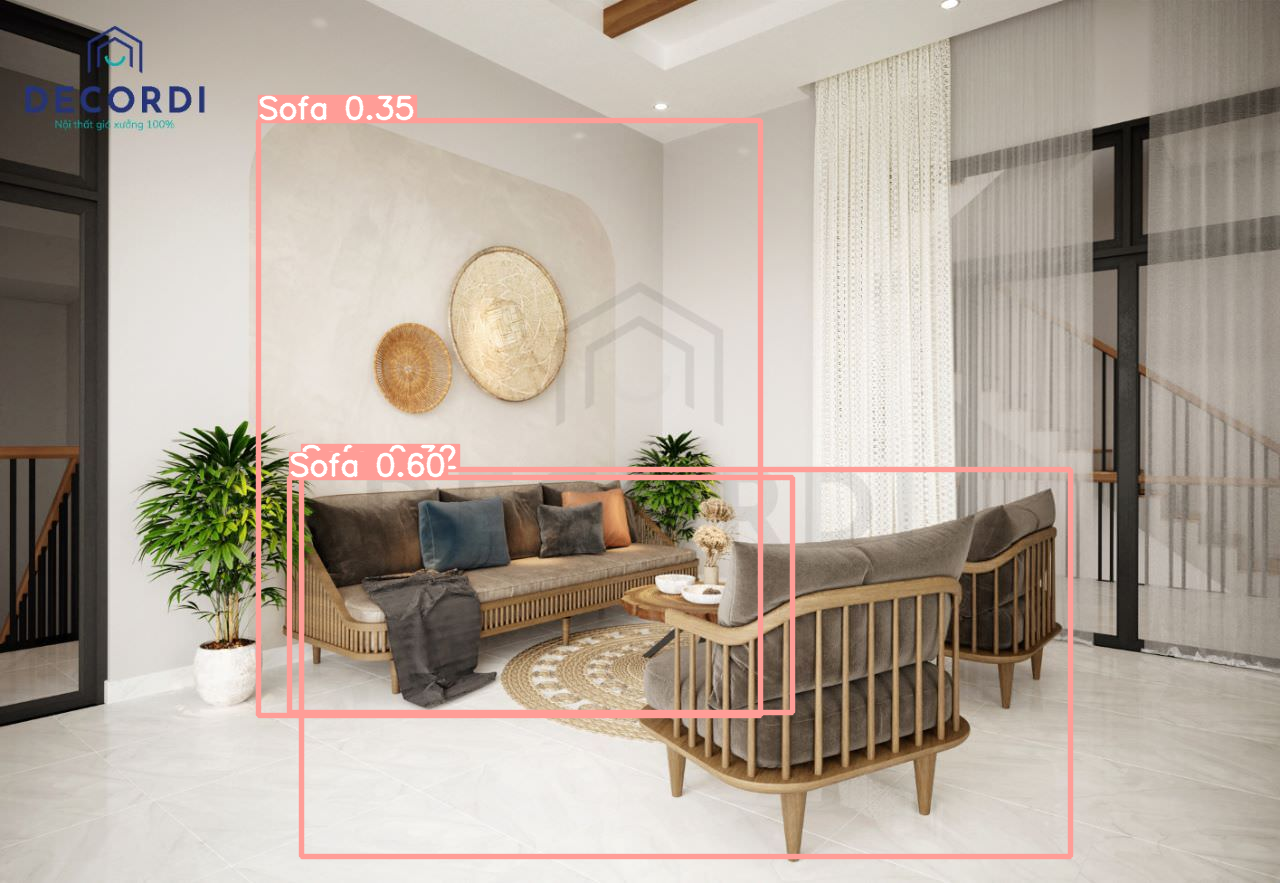

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/yolov9/runs/detect/exp8/testimage_01.png', width=800)